In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.linear_model import LogisticRegression

## load the data 
diabetesDF = pd.read_csv('diabetes.csv')
print(diabetesDF.head())

   Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1  


In [2]:

## split and normalize the data  
#  split into train and test 
dfTrain = diabetesDF[:650]
dfTest = diabetesDF[650:750]
dfCheck = diabetesDF[750:]

#  split features from target variable 
trainLabel = np.asarray(dfTrain['Outcome'])
trainData = np.asarray(dfTrain.drop('Outcome', 1))
testLabel = np.asarray(dfTest['Outcome'])
testData = np.asarray(dfTest.drop('Outcome', 1))

#  normalize the data 
#  makes it easier to interpret the model by looking at its weights
means = np.mean(trainData, axis=0)
stds = np.std(trainData, axis=0)
trainData = (trainData - means) / stds
testData = (testData - means) / stds


In [3]:

## train and evaluate the model
#  models target t as sigmoid(w0 + w1*x1 + w2*x2 + ... + wd*xd)
diabetesCheck = LogisticRegression()
diabetesCheck.fit(trainData, trainLabel)
accuracy = diabetesCheck.score(testData, testLabel)
print("accuracy = ", accuracy * 100, "%")
#  prints "accuracy = 78.0%"


## interpreting the model 
coeff = list(diabetesCheck.coef_[0])
labels = list(dfTrain.drop('Outcome', 1).columns)


accuracy =  78.0 %


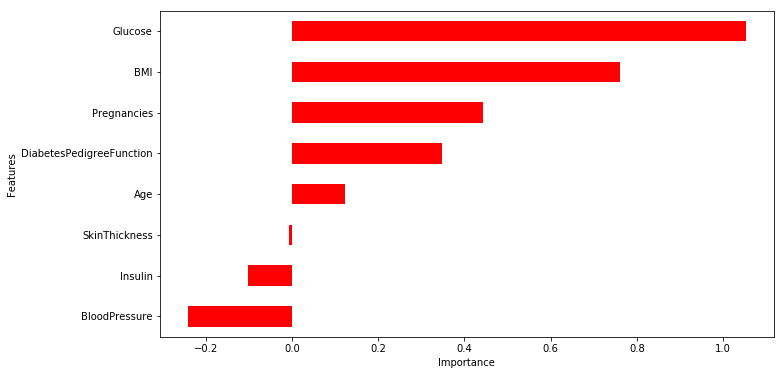

In [5]:
features = pd.DataFrame()
features['Features'] = labels
features['importance'] = coeff
features.sort_values(by=['importance'], ascending=True, inplace=True)
features['positive'] = features['importance'] > 0
features.set_index('Features', inplace=True)
features.importance.plot(kind='barh', figsize=(11, 6), color=features.positive.map({True: 'blue', False: 'red'}))
plt.xlabel('Importance')
plt.show()


In [6]:

## making predictions
sampleData = dfCheck[:1]
# prepare sample
sampleDataFeatures = np.asarray(sampleData.drop('Outcome',1))
sampleDataFeatures = (sampleDataFeatures - means)/stds
# predict
predictionProbability = diabetesCheck.predict_proba(sampleDataFeatures)
prediction = diabetesCheck.predict(sampleDataFeatures)
print('Probability:', predictionProbability)
print('prediction:', prediction)


Probability: [[ 0.4385153  0.5614847]]
prediction: [1]
